**Transformers setup**

In [1]:
!pip install git+https://github.com/huggingface/transformers
!git clone https://github.com/huggingface/transformers
!pwd
%ls
%cd transformers
!python setup.py install
%cd ..

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-zsfqbqrp
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-zsfqbqrp
  Resolved https://github.com/huggingface/transformers to commit 176ceff91f5e5ff15922715e5a4a4d9f66b92d14
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.2 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.28.0.dev0-py3-none-any.whl size=6892805 sha256=9c6d488bb1624758d4825f1fca6c799307fd64287e08e47dd060dadb8e72a711
  Stored in directory: /tmp/pip-ephem-wheel-cache-sbsu5uo3/wheels/14/a0/7b

In [ ]:
!git clone https://github.com/huggingface/transformers

In [ ]:
!pwd
%ls
%cd transformers

In [ ]:
!python setup.py install

**Datasets Setup**

In [ ]:
!pip install git+https://github.com/huggingface/datasets.git
!git clone https://github.com/huggingface/datasets.git
!pwd
%ls
%cd datasets
!python setup.py install

In [ ]:
!git clone https://github.com/huggingface/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 67471, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 67471 (delta 80), reused 131 (delta 55), pack-reused 67290
Receiving objects: 100% (67471/67471), 91.27 MiB | 24.89 MiB/s, done.
Resolving deltas: 100% (31971/31971), done.


In [ ]:
%cd ..

/content


In [ ]:
!pwd
%ls
%cd datasets

/content
datasets/  sample_data/  transformers/
/content/datasets


In [ ]:
!python setup.py install

**Using Libraries**

In [ ]:
import torchvision
import os
from transformers import YolosImageProcessor, YolosFeatureExtractor
#feature_extractor = AutoFeatureExtractor.from_pretrained("hustvl/yolos-small", size=512, max_size=864)
feature_extractor = YolosFeatureExtractor.from_pretrained("hustvl/yolos-small", size=512, max_size=864)


/usr/local/lib/python3.9/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:28: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/models/yolos/image_processing_yolos.py:710: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [9]:
from transformers import AutoImageProcessor, YolosModel
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
image_processor = AutoImageProcessor.from_pretrained("hustvl/yolos-small")
model = YolosModel.from_pretrained("hustvl/yolos-small")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

RuntimeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# url = '/content/drive/MyDrive/VIP-Spring_2023-Plant_Recognition/Data/flowers/dandelion/5760890854_c3e009bc8a_n.jpg'

url = "http://images.cocodataset.org/val2017/000000039769.jpg"


In [ ]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image
import requests

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("hustvl/yolos-tiny")
model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Detected remote with confidence 0.994 at location [46.96, 72.61, 181.02, 119.73]
Detected remote with confidence 0.975 at location [340.66, 79.19, 372.59, 192.65]
Detected cat with confidence 0.984 at location [12.27, 54.25, 319.42, 470.99]
Detected remote with confidence 0.922 at location [41.66, 71.96, 178.7, 120.33]
Detected cat with confidence 0.914 at location [342.34, 21.48, 638.64, 372.46]


(640, 480)
remote
<class 'str'>
remote
<class 'str'>
cat
<class 'str'>
remote
<class 'str'>
cat
<class 'str'>


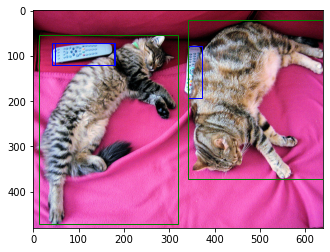

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
print(image.size)
ax.imshow(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = box.detach().numpy()
    print(model.config.id2label[label.item()])
    string = model.config.id2label[label.item()]
    print(type(string))
    if (string == "remote"):
      rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='b', facecolor='none')
    else:
      rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='g', facecolor='none')
      
    ax.add_patch(rect)
# rect = patches.Rectangle((70,41), 120, 155, linewidth=2, edgecolor='b', facecolor='none')
# ax.add_patch(rect)

plt.show()

Training Model

In [2]:
!pip install roboflow
!pip install pytorch_lightning
!python3 -m pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=cbf084a7136016c1b7321918f12996e2675efb042b0845ef3073c62ccec06c80
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.4/716.4 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 26.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="wOqbDEbvHPTczhPziPHK")
project = rf.workspace("plantrecognition-kd7na").project("plant-recognition-wbhud")
dataset = project.version(2).download("coco")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Plant-recognition-2 in coco:: 100%|██████████| 279/279 [00:00<00:00, 3819.14it/s]


In [4]:
import torchvision
import os

class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, feature_extractor, train=True):
        ann_file = os.path.join(img_folder, "_annotations.coco.json")
        super(CocoDetection, self).__init__(img_folder, ann_file)
        self.feature_extractor = feature_extractor

    def __getitem__(self, idx):
        # read in PIL image and target in COCO format
        img, target = super(CocoDetection, self).__getitem__(idx)
        
        # preprocess image and target (converting target to DETR format, resizing + normalization of both image and target)
        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        encoding = self.feature_extractor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze() # remove batch dimension
        target = encoding["labels"][0] # remove batch dimension

        return pixel_values, target

from transformers import AutoFeatureExtractor, AutoImageProcessor

# feature_extractor = AutoFeatureExtractor.from_pretrained("hustvl/yolos-small", size=512, max_size=864)
feature_extractor = AutoImageProcessor.from_pretrained("hustvl/yolos-small")

train_dataset = CocoDetection(img_folder=(dataset.location + '/train'), feature_extractor=feature_extractor)
val_dataset = CocoDetection(img_folder=(dataset.location + '/valid'), feature_extractor=feature_extractor, train=False)

print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(val_dataset))

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Number of training examples: 188
Number of validation examples: 53


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [5]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  pixel_values = [item[0] for item in batch]
  encoding = feature_extractor.pad(pixel_values, return_tensors="pt")
  labels = [item[1] for item in batch]
  batch = {}
  batch['pixel_values'] = encoding['pixel_values']
  # batch['pixel_mask'] = encoding['pixel_mask']
  batch['labels'] = labels
  return batch

TRAIN_DATALOADER = DataLoader(dataset=train_dataset, collate_fn=collate_fn, batch_size=4, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=val_dataset, collate_fn=collate_fn, batch_size=4)

In [6]:
import pytorch_lightning as pl
from transformers import AutoModelForObjectDetection
import torch

categories = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

class Yolo(pl.LightningModule):

    def __init__(self, lr, lr_backbone, weight_decay):
        super().__init__()
        self.model = AutoModelForObjectDetection.from_pretrained(
            pretrained_model_name_or_path="hustvl/yolos-small", 
            num_labels=len(id2label),
            ignore_mismatched_sizes=True
        )
        
        self.lr = lr
        self.lr_backbone = lr_backbone
        self.weight_decay = weight_decay

    def forward(self, pixel_values):
        return self.model(pixel_values=pixel_values)

    def common_step(self, batch, batch_idx):
        pixel_values = batch["pixel_values"]
        labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

        outputs = self.model(pixel_values=pixel_values, labels=labels)

        loss = outputs.loss
        loss_dict = outputs.loss_dict

        return loss, loss_dict

    def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)     
        # logs metrics for each training_step, and the average across the epoch
        self.log("training_loss", loss)
        for k,v in loss_dict.items():
            self.log("train_" + k, v.item())

        return loss

    def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)     
        self.log("validation/loss", loss)
        for k, v in loss_dict.items():
            self.log("validation_" + k, v.item())
            
        return loss

    def configure_optimizers(self):
        # DETR authors decided to use different learning rate for backbone
        # you can learn more about it here: 
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L22-L23
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L131-L139
        param_dicts = [
            {
                "params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
            {
                "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                "lr": self.lr_backbone,
            },
        ]
        return torch.optim.AdamW(param_dicts, lr=self.lr, weight_decay=self.weight_decay)

    def train_dataloader(self):
        return TRAIN_DATALOADER

    def val_dataloader(self):
        return VAL_DATALOADER

In [7]:
model = Yolo(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

Some weights of YolosForObjectDetection were not initialized from the model checkpoint at hustvl/yolos-small and are newly initialized because the shapes did not match:
- class_labels_classifier.layers.2.weight: found shape torch.Size([92, 384]) in the checkpoint and torch.Size([7, 384]) in the model instantiated
- class_labels_classifier.layers.2.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [11]:
%env WANDB_PROJECT=plant-recognition

env: WANDB_PROJECT=plant-recognition


In [14]:
wandb.finish()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pytorch_lightning import Trainer
import wandb

from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger

# settings
MAX_EPOCHS = 40

# pytorch_lightning < 2.0.0
# trainer = Trainer(gpus=1, max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)
#logger = TensorBoardLogger("tb_logs", name="YOLO_plant")
#wandb.finish()
wandb_logger = WandbLogger(project="plant-recognition")

# pytorch_lightning >= 2.0.0
# trainer = Trainer(default_root_dir="/content/drive/MyDrive/VIP-Spring_2023-Plant_Recognition/" , devices=1, accelerator="gpu", max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)
trainer = Trainer(default_root_dir="/content/drive/MyDrive/VIP-Spring_2023-Plant_Recognition/" ,logger=wandb_logger, devices=1, accelerator="gpu", max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

trainer.fit(model)
trainer.save_checkpoint("/content/drive/MyDrive/VIP-Spring_2023-Plant_Recognition/example.ckpt")


In [19]:
reload_model = Yolo.load_from_checkpoint("/content/drive/MyDrive/VIP-Spring_2023-Plant_Recognition/example.ckpt", lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4).to("cuda")

Some weights of YolosForObjectDetection were not initialized from the model checkpoint at hustvl/yolos-small and are newly initialized because the shapes did not match:
- class_labels_classifier.layers.2.weight: found shape torch.Size([92, 384]) in the checkpoint and torch.Size([7, 384]) in the model instantiated
- class_labels_classifier.layers.2.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [1]:
url = '/content/drive/MyDrive/VIP-Spring_2023-Plant_Recognition/Data/flowers/daisy/8718637649_87a0d85190_n.jpg'

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"


In [2]:
import torchvision.transforms as transforms
import torch
from PIL import Image
import requests

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(url)
transform = transforms.Compose([transforms.PILToTensor()])
tensor = transform(image).to("cuda")

inputs = feature_extractor(images=tensor, return_tensors="pt").to("cuda")
inputs = inputs.to("cuda")

outputs = reload_model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )


FileNotFoundError: ignored

(320, 228)


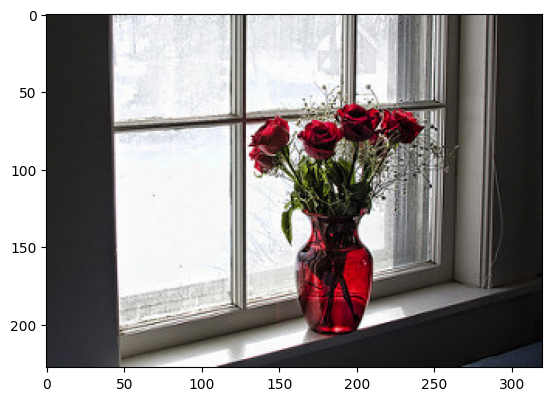

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
print(image.size)
ax.imshow(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = box.cpu().detach().numpy()
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='b', facecolor='none')
    plt.text(box[0], box[1], f"{id2label[label.item()]}: {round(score.item() * 100, 1) }%", fontdict=None, color = 'w')
    ax.add_patch(rect)
# rect = patches.Rectangle((70,41), 120, 155, linewidth=2, edgecolor='b', facecolor='none')
# ax.add_patch(rect)

plt.show()
